# K-means Clustering - Lab

## Introduction

In this lab, you'll implement the k-means clustering algorithm using scikit-learn to analyze a dataset!

## Objectives

In this lab you will: 

- Perform k-means clustering in scikit-learn 
- Describe the tuning parameters found in scikit-learn's implementation of k-means clustering 
- Use an elbow plot with various metrics to determine the optimal number of clusters 


## The K-means Algorithm 

The k-means clustering algorithm is an iterative algorithm that reaches for a predetermined number of clusters within an unlabeled dataset, and basically works as follows:

- Select $k$ initial seeds
- Assign each observation to the cluster to which it is the "closest" 
- Recompute the cluster centroids
- Reassign the observations to one of the clusters according to some rule
- Stop if there is no reallocation 


## Create a Dataset

For this lab, we'll create a synthetic dataset to work with, so that there are clearly defined clusters we can work with to see how well the algorithm performs. 

In the cell below:

* Import `make_blobs` from `sklearn.datasets`
* Import `pandas`, `numpy`, and `matplotlib.pyplot`, and set the standard alias for each  
* Set matplotlib visualizations to display inline
* Use `numpy` to set a random seed of `1` 
* Import `KMeans` from `sklearn.cluster`

In [1]:
# Your code here
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
np.random.seed(1)
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

Now, we'll use `make_blobs()` to create our dataset. 

In the cell below:

* Call `make_blobs()`, and pass in the following parameters:
    * `n_samples=400`
    * `n_features=2`
    * `centers=6`
    * `cluster_std=0.8`

In [2]:
X, y = make_blobs(n_samples=400, n_features=2, centers=6, cluster_std=0.8)

Now let's visualize our clusters to see what we've created. Run the cell below to visualize our newly created dataset.

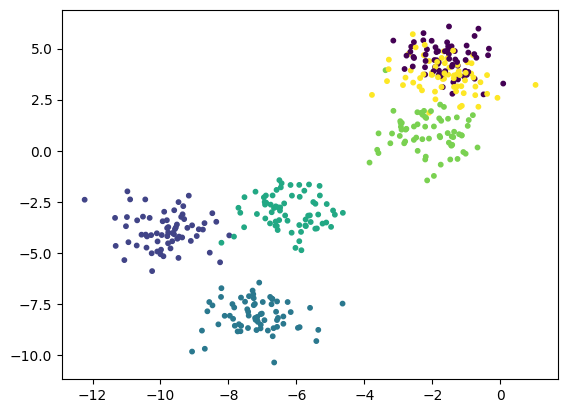

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=10);

The nice thing about creating a synthetic dataset with `make_blobs()` is that it can assign ground-truth clusters, which is why each of the clusters in the visualization above are colored differently. Because of this, we have a way to check the performance of our clustering results against the ground truth of the synthetic dataset. Note that this isn't something that we can do with real-world problems (because if we had labels, we'd likely use supervised learning instead!). However, when learning how to work with clustering algorithms, this provides a solid way for us to learn a bit more about how the algorithm works. 

## Using K-means

Let's go ahead and instantiate a `KMeans` class and fit it to our data. Then, we can explore the results provided by the algorithm to see how well it performs. 

In the cell below:

* Instantiate the `KMeans` class, and set `n_clusters` to `6` 
* Fit `KMeans` to the data stored in `X` 
* Predict which clusters each data point belongs to 

In [4]:
k_means = KMeans(n_clusters=6)
k_means.fit(X)
predicted_clusters = k_means.predict(X)

Now that we have the predicted clusters, let's visualize them and compare to the original data 

In the cell below: 

* Create a scatter plot as we did up above, but this time, set `c=predicted_clusters`. The first two arguments and `s=10` should stay the same  
* Get the cluster centers from the object's `.cluster_centers_` attribute  
* Create another scatter plot, but this time, for the first two arguments, pass in `centers[:, 0]` and `centers[:, 1]`. Also set `c='black'` and `s=70` 

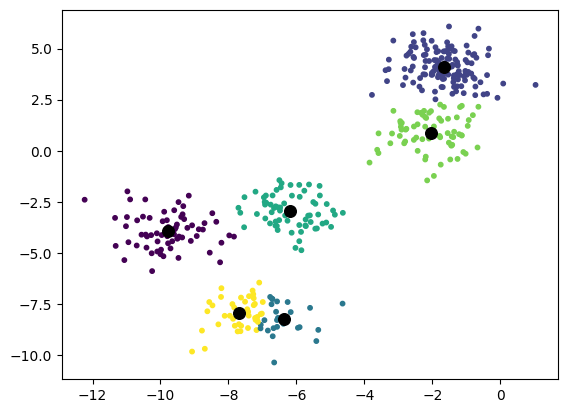

In [5]:

plt.scatter(X[:, 0], X[:, 1], c=predicted_clusters, s=10)

centers = k_means.cluster_centers_

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=70);


**_Question:_**

In your opinion, do the centroids match up with the cluster centers?

Write your answer below this line:
_______________________________________________________________________________



## Tuning Parameters

As you can see, the k-means algorithm is pretty good at identifying the clusters. Do keep in mind that for a real dataset, you will not be able to evaluate the method as such, as we don't know a priori what the clusters should be. This is the nature of unsupervised learning. The scikit-learn documentation does suggest two methods to evaluate your clusters when the "ground truth" is not known: the Silhouette coefficient and the Calinski-Harabasz index. We'll talk about them later, but first, let's look at the scikit-learn options when using KMeans.

The nice thing about the scikit-learn's k-means clustering algorithm is that certain parameters can be specified to tweak the algorithm. We'll discuss two important parameters which we haven't specified before: `init` and `algorithm`.

### 1. The `init` parameter

`init` specifies the method for initialization:

- `k-means++`: is the default method, this method selects initial cluster centers in a smart way in order to pursue fast convergence 
- `random`: choose $k$ random observations for the initial centroids 
- `ndarray`: you can pass this argument and provide initial centers 

### 2. The `algorithm` parameter

`algorithm` specifies the algorithm used:

- If `full` is specified, a full EM-style algorithm is performed. EM is short for "Expectation Maximization" and its name is derived from the nature of the algorithm, wherein each iteration an E-step (in the context of K-means clustering, the points are assigned to the nearest center) and an M-step (the cluster mean is updated based on the elements of the cluster) is created 
- The EM algorithm can be slow. The `elkan` variation is more efficient, but not available for sparse data 
- The default is `auto`, and automatically selects `full` for sparse data and `elkan` for dense data 

### Dealing With an Unknown Number of Clusters

Now, let's create another dataset. This time, we'll randomly generate a number between 3 and 8 to determine the number of clusters, without us knowing what that value actually is. 

In the cell below:

* Create another dataset using `make_blobs()`. Pass in the following parameters:
    * `n_samples=400`
    * `n_features=2`
    * `centers=np.random.randint(3, 8)`
    * `cluster_std = 0.8`

In [6]:
X_2, y_2 = make_blobs(n_samples=400, n_features=2, centers=np.random.randint(3, 8))

Now we've created a dataset, but we don't know how many clusters actually exist in this dataset, so we don't know what value to set for $k$!

In order to figure out the best value for $k$, we'll create a different version of the clustering algorithm for each potential value of $k$, and find the best one using an **_Elbow Plot_**.   


In the cell below, instantiate and fit `KMeans` with a different value for `n_clusters` between 3 and 7, inclusive.

Then, store each of the objects in a list. 

In [7]:
k_means_3 = KMeans(n_clusters=3).fit(X_2)
k_means_4 = KMeans(n_clusters=4).fit(X_2)
k_means_5 = KMeans(n_clusters=5).fit(X_2)
k_means_6 = KMeans(n_clusters=6).fit(X_2)
k_means_7 = KMeans(n_clusters=7).fit(X_2)

k_list = [k_means_3, k_means_4, k_means_5, k_means_6, k_means_7]

Now, in the cell below, import `calinski_harabasz_score` from `sklearn.metrics`. 

In [8]:
# Your code here
from sklearn.metrics import calinski_harabasz_score

This is a metric used to judge how good our overall fit is. This score works by computing a ratio of between-cluster distance to inter-cluster distance. Intuitively, we can assume that good clusters will have smaller distances between the points in each cluster, and larger distances to the points in other clusters.

Note that it's not a good idea to just exhaustively try every possible value for $k$. As $k$ grows, the number of points inside each cluster shrinks, until $k$ is equal to the total number of items in our dataset. At this point, each cluster would report a perfect variance ratio, since each point is at the center of their own individual cluster! 

Instead, our best method is to plot the variance ratios and find the **_elbow_** in the plot. Here's an example of the type of plot you'll generate:

<img src='https://curriculum-content.s3.amazonaws.com/data-science/images/wcss_elbow1.png' width = "500">

In this example, the elbow is at $k=5$. This provides the biggest change to the within-cluster sum of squares score, and every one after that provides only a minimal improvement. Remember, the elbow plot will have a positive or negative slope depending on the metric used for cluster evaluation. Time to try it out on our data to determine the optimal number of clusters!

In the cell below:

* Create an empty list called `CH_score` 
* Loop through the models you stored in `k_list`  
    * For each model, get the labels from the `.labels_` attribute 
    * Calculate the `calinski_harabasz_score()` and pass in the data, `X_2`, and the `labels`. Append this score to `CH_score` 

In [9]:
CH_score =  []

for model in k_list:
    labels = model.labels_
    CH_score.append(calinski_harabasz_score(X_2, labels))

Run the cell below to visualize our elbow plot of CH scores. 

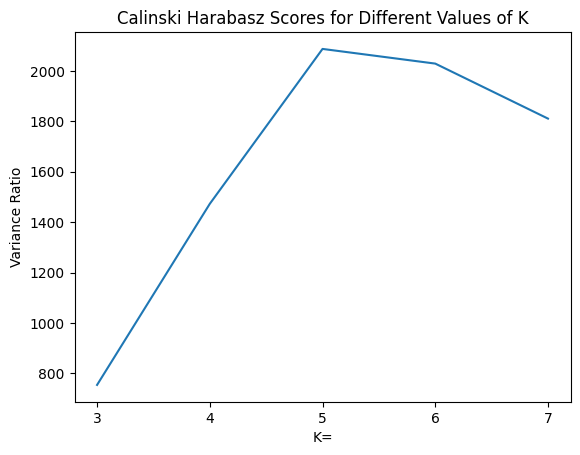

In [10]:
plt.plot([3, 4, 5, 6, 7], CH_score)
plt.xticks([3,4,5,6,7])
plt.title('Calinski Harabasz Scores for Different Values of K')
plt.ylabel('Variance Ratio')
plt.xlabel('K=')
plt.show()

That's one metric for evaluating the results; let's take a look at another metric, inertia, also known as Within Cluster Sum of Squares (WCSS). In the cell below:

* Create an empty list called `wcss_score`
* Loop through the models you stored in `k_list` 
    * For each model, get the labels from the `.labels_` attribute 
    * Obtain the `inertia_` attribute from each clustering model and append this value to `wcss_score`  

After creating this, run the cell below it to create a graph.

In [11]:
wcss_score = []

for model in k_list:
    labels = model.labels_
    wcss_score.append(model.inertia_)

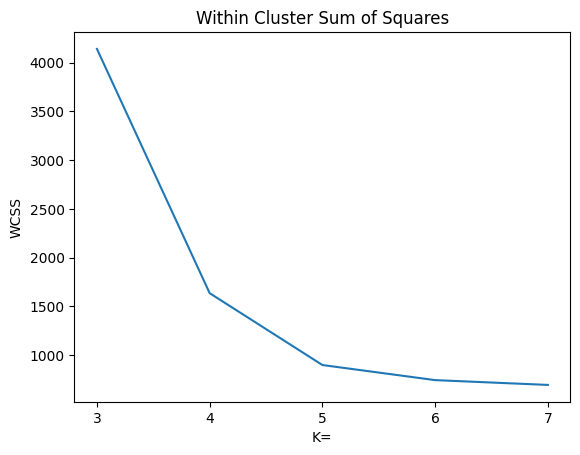

In [12]:
plt.plot([3, 4, 5, 6, 7], wcss_score)
plt.xticks([3,4,5,6,7])
plt.title('Within Cluster Sum of Squares')
plt.ylabel('WCSS')
plt.xlabel('K=')
plt.show()

**_Question:_**  Interpret the elbow plots you just created. Where are the "elbows" in these plots? According to these plots, how many clusters do you think actually exist in the dataset you created?

Write your answer below this line:
_______________________________________________________________________________

Let's end by visualizing the `X_2` dataset you created to see what the data actually looks like.

In the cell below, create a scatterplot to visualize `X_2`. Set `c=y_2` so that the plot colors each point according to its ground-truth cluster and set `s=10` so the points won't be too big. 

In [ ]:
# Your code here
"""
There is a clear "elbow" in the CH score graph at 6 clusters, and it looks like there is an elbow at either 5 or 6 clusters 
as well in the second graph where we're using Within Cluster Sum of Squares as our evaluation metric. With this evidence in hand, 
let's take a look at the actual number of clusters.
"""

We were right! The data does actually contain six clusters. Note that there are other types of metrics that can also be used to evaluate the correct value for $k$, such as the Silhouette score. However, checking the variance ratio by calculating the Calinski Harabasz scores is one of the most tried-and-true methods, and should definitely be one of the first tools you reach for when trying to figure out the optimal value for $k$ with k-means clustering. 

## A Note on Dimensionality

We should also note that for this example, we were able to visualize our data because it only contained two dimensions. In the real world, working with datasets with only two dimensions is quite rare. This means that you can't always visualize your plots to double-check your work. For this reason, it's extra important to be considerate about the metrics you use to evaluate the performance of your clustering algorithm since you won't be able to "eyeball" it and visually check how many clusters the data looks like it has when you're working with datasets that contain hundreds of dimensions!


## Summary

In this lesson, you used the k-means clustering algorithm in scikit-learn. You also learned a strategy for finding the optimal value for $k$ by using elbow plots and variance ratios for when you're working with data and you don't know how many clusters actually exist. 